# Using Python for Research Homework: Week 4, Case Study 2

In this case study, we will continue taking a look at patterns of flight for each of the three birds in our dataset.

In [1]:
# DO NOT EDIT THIS CODE
import pandas as pd
import numpy as np
birddata = pd.read_csv("https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@bird_tracking.csv", index_col=0)
birddata.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


### Exercise 1

In this case study, we will continue taking a look at patterns of flight for each of the three birds in our dataset. We will group the flight patterns by bird and date, and plot the mean altitude for these groupings.

`pandas` makes it easy to perform basic operations on groups within a dataframe without needing to loop through each value in the dataframe. In this exercise, we will group the dataframe by `birdname` and then find the average `speed_2d` for each bird.

#### Instructions 
- Fill in the code to find the mean altitudes of each bird using the pre-loaded `birddata` dataframe. 

In [11]:
# First, use `groupby()` to group the data by "bird_name".
grouped_birds = birddata.groupby('bird_name')

# Now calculate the mean of `speed_2d` using the `mean()` function.
mean_speeds = grouped_birds.speed_2d.mean()

# Find the mean `altitude` for each bird.
mean_altitudes = grouped_birds.mean() 

mean_speeds

bird_name
Eric     2.300545
Nico     2.908726
Sanne    2.450434
Name: speed_2d, dtype: float64

### Exercise 2

In this exercise, we will group the flight times by date and calculate the mean altitude within that day.

#### Instructions 
- Convert `birddata.date_time` to the `pd.datetime` format, and store as `birddata["date"]`.
- Fill in the code to find the mean altitudes for each day.

In [28]:
# Convert birddata.date_time to the `pd.datetime` format.
birddata.date_time = pd.to_datetime(birddata.date_time)

# Create a new column of day of observation
birddata["date"] = birddata.date_time.dt.date

# Use `groupby()` to group the data by date.
grouped_bydates = birddata.groupby("date")

# Find the mean `altitude` for each date.
mean_altitudes_perday = grouped_bydates.altitude.mean()
mean_altitudes_perday[12:30]

date
2013-08-27     84.591093
2013-08-28    111.210526
2013-08-29    177.421488
2013-08-30     92.520161
2013-08-31    160.975904
2013-09-01     84.753086
2013-09-02     88.128514
2013-09-03     93.975709
2013-09-04     90.717213
2013-09-05     87.264000
2013-09-06     89.020492
2013-09-07    103.412955
2013-09-08     76.566265
2013-09-09     81.483471
2013-09-10     90.618852
2013-09-11     77.222672
2013-09-12     75.646091
2013-09-13     66.615079
Name: altitude, dtype: float64

### Exercise 3

In this exercise, we will group the flight times by both bird and date, and calculate the mean altitude for each.

#### Instructions 
- `birddata` already contains the `date` column. To find the average speed for each bird and day, create a new grouped dataframe called `grouped_birdday` that groups the data by both `bird_name` and date.

In [43]:
# Use `groupby()` to group the data by bird and date.
grouped_birdday = birddata.groupby(["bird_name", "date"])

# Find the mean `altitude` for each bird and date.
mean_altitudes_perday = grouped_birdday.altitude.mean()
mean_altitudes_perday[480:500]

bird_name  date      
Nico       2014-03-31     7.719512
           2014-04-01    21.024390
           2014-04-02    16.262500
           2014-04-03     1.707317
           2014-04-04    87.743590
           2014-04-05    44.544304
           2014-04-06    11.385542
           2014-04-07    15.480519
           2014-04-08    -0.275000
           2014-04-09    25.175000
           2014-04-10    17.487500
           2014-04-11    19.512195
           2014-04-12     5.837500
           2014-04-13     5.040000
           2014-04-14    -3.734177
           2014-04-15    21.316456
           2014-04-16    -5.562500
           2014-04-17    10.736842
           2014-04-18   -11.012658
           2014-04-19    28.349398
Name: altitude, dtype: float64

### Exercise 4

Great! Now find the average speed for each bird and day.

#### Instructions 

- Store these are three `pandas` `Series` objects, one for each bird.
- Use the plotting code provided to plot the average speeds for each bird.

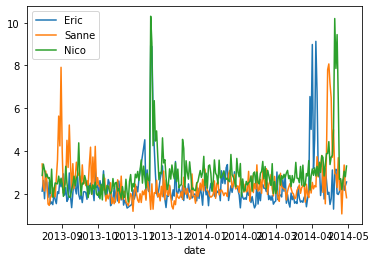

In [34]:
import matplotlib.pyplot as plt

eric_daily_speed  = grouped_birdday.speed_2d.mean()["Eric"]
sanne_daily_speed = grouped_birdday.speed_2d.mean()["Sanne"]
nico_daily_speed  = grouped_birdday.speed_2d.mean()["Nico"]

eric_daily_speed.plot(label="Eric")
sanne_daily_speed.plot(label="Sanne")
nico_daily_speed.plot(label="Nico")
plt.legend(loc="upper left")
plt.show()

In [48]:
nico_daily_speed[-50:-20]

date
2014-03-12    2.707914
2014-03-13    2.853118
2014-03-14    2.333892
2014-03-15    2.849500
2014-03-16    2.520370
2014-03-17    2.739105
2014-03-18    3.468390
2014-03-19    2.730760
2014-03-20    2.718993
2014-03-21    2.512176
2014-03-22    3.277353
2014-03-23    2.400540
2014-03-24    3.338499
2014-03-25    2.348788
2014-03-26    2.421999
2014-03-27    2.944375
2014-03-28    2.833248
2014-03-29    3.550028
2014-03-30    2.176832
2014-03-31    2.824631
2014-04-01    3.163723
2014-04-02    2.861222
2014-04-03    3.212099
2014-04-04    2.832465
2014-04-05    3.283842
2014-04-06    2.824700
2014-04-07    3.455989
2014-04-08    2.995421
2014-04-09    3.780186
2014-04-10    3.703409
Name: speed_2d, dtype: float64